In [4]:
!pip install diffusers transformers safetensors accelerate

In [5]:
import torch
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt
import os

In [1]:
def load_model(base_model_id, weights_path=None, weight_name=None):
    pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
    if weights_path and weight_name:
        pipeline.load_lora_weights(weights_path, weight_name=weight_name)
    return pipeline

In [6]:
def generate_image(pipeline, prompt, num_inference_steps):
    result = pipeline(prompt, num_inference_steps=num_inference_steps)
    return result.images[0]

In [7]:
def show_image(image):
    plt.axis('off')
    plt.imshow(image)
    plt.show()

In [10]:
def main():
    base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
    weights_path = "nerijs/pixel-art-xl"
    weight_name = "pixel-art-xl.safetensors"
    prompt = "Pixel art zoro from one piece"
    num_inference_steps = 100

    pipeline = load_model(base_model_id, weights_path, weight_name)
    image = generate_image(pipeline, prompt, num_inference_steps)
    show_image(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

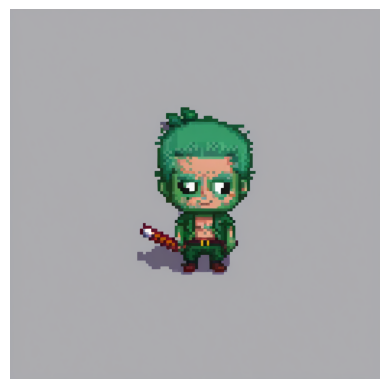

In [11]:
main()